### **Customer Churn Prediction**

### **Business Understanding**

#### Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

#### For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

#### In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem


##### **Problem Statement**: A telecommunications company intends to understand the lifetime value of each customer and know what factors affect the rate at which customers stop using their network. The company would like to build a model that predicts whether a customer will churn or not.

##### **Goal**: To build a machine learning model that predicts whether a customer will churn or not

#### **Hypothesis**

##### **Null Hypothesis**: There is no statistically significant relationship between tenure and customer churn 
##### **Alternative hypothesis**: There is a statistically significant relationship between tenure and customer churn 






#### Analytical Questions
1. How do monthly charges and total charges impact customer churning?
2. How does tech support influence the likelihood of a customer to churn or not?
3. How does tenure impact customer churning?
4. What are the most influential factors that influence the likelihood of a customer to churn or not?
5. What are the least influential factors that influence the likelihood of a customer to churn or not? 
 

#### Project Timeline
- Modeling - 1 week
- Strategy & business insights - 1 week

## **Data Understanding**

#### **Import Packages**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [3]:
import pyodbc    
from dotenv import dotenv_values
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

#### **Data Loading**

 #### Connect to the first dataset in an SQL server

In [4]:

# Fill in database credentials to connect to it
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'LP2_project'
password = 'Stat$AndD@t@Rul3'

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Connect to the database
connection = pyodbc.connect(connection_string)


In [5]:
# create query to connect to data set
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

#display the data
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Load the second dataset, a CSV file

In [6]:
# Load the second data set

second_data = pd.read_csv("C:/Users/Zawadi/Desktop/Azubi/Customer-Churn-Prediction/Data/LP2_Telco-churn-second-2000.csv")

# Display first five rows of the data

second_data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### **Exploratory Data Analysis**

### First Dataset

In [7]:
#Vie the info of the first dataset called data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
# review the statistical information of the first dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [9]:
# check for duplicates
data.duplicated().sum()

0

In [10]:
# check for missing values
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

### Second Dataset

In [11]:
### On the second data set called second_data

second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [12]:
# See statistical info
second_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [13]:
# Check for duplicates
second_data.duplicated().sum()

0

In [14]:
# check for null values
second_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Key Insights
- The first dataset 'data' is in different scales
- There are 3000 entries
- There are missing values in some of the columns

- The second dataset 'second_data' has no duplicates or missing values



## Concatenate the datasets

In [36]:
def concat_dataframes(data, second_data):
    """
    Concatenates two dataframes along the row axis.

    Parameters:
    data (pandas.DataFrame): The first dataframe to concatenate.
    second_data (pandas.DataFrame): The second dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    data = data.rename(columns= {'customerID':'customerid', 'gender':'gender', 'SeniorCitizen':'seniorcitizen', 'Partner':'partner', 'Dependents':'dependents',
       'tenure':'tenure', 'PhoneService':'phoneservice', 'MultipleLines':'multiplelines', 'InternetService':'internetservice',
       'OnlineSecurity':'onlinesecurity', 'OnlineBackup':'onlinebackup', 'DeviceProtection':'deviceprotection', 'TechSupport':'techsupport',
       'StreamingTV':'streamingtv', 'StreamingMovies':'streamingmovies', 'Contract':'contract', 'PaperlessBilling':'paperlessbilling',
       'PaymentMethod':'paymentmethod', 'MonthlyCharges':'monthlycharges', 'TotalCharges':'totalcharges', 'Churn':'churn'})
    
    second_data = second_data.rename(columns={'customerID':'customerid', 'gender':'gender', 'SeniorCitizen':'seniorcitizen', 'Partner':'partner', 'Dependents':'dependents',
       'tenure':'tenure', 'PhoneService':'phoneservice', 'MultipleLines':'multiplelines', 'InternetService':'internetservice',
       'OnlineSecurity':'onlinesecurity', 'OnlineBackup':'onlinebackup', 'DeviceProtection':'deviceprotection', 'TechSupport':'techsupport',
       'StreamingTV':'streamingtv', 'StreamingMovies':'streamingmovies', 'Contract':'contract', 'PaperlessBilling':'paperlessbilling',
       'PaymentMethod':'paymentmethod', 'MonthlyCharges':'monthlycharges', 'TotalCharges':'totalcharges', 'Churn':'churn'})
    
    # Concatenate dataframes along the row axis
    return pd.concat([data, second_data]).reset_index(drop=True)
    return result

In [37]:
## combined dataset (df)
df = concat_dataframes(data,second_data)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### **Univariate Analysis**

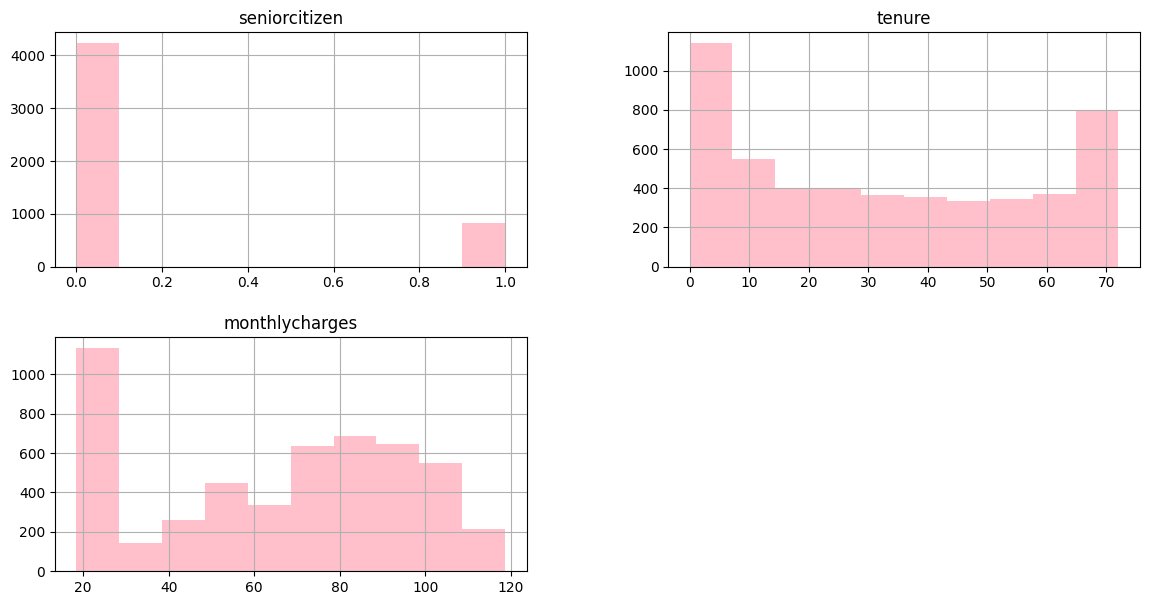

In [40]:
df.hist(figsize =(14, 7), color = 'pink')
plt.show()

<Axes: ylabel='Density'>

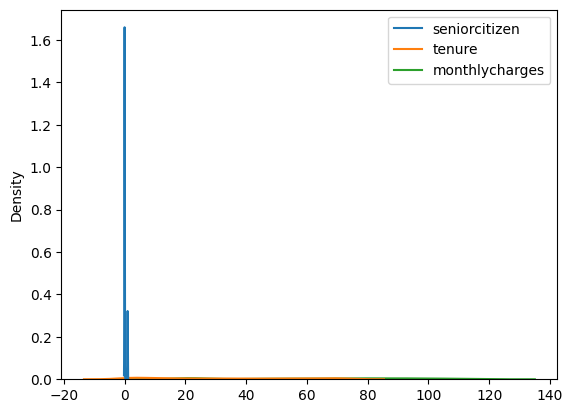

In [39]:
# check the density distribution

sns.kdeplot(df)

##### The above density distribution is too scaled. The column "Total Charges' is bringing in a very large scale since it has the highest number. The best thing to do is to remove this column since we already monthly charges for each customer. 

# Exploratory Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [25]:
# check descriptive statistics
df.describe(include='all')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,5043,5043,5043.000000,5043,5043,5043.000000,5043,4774,5043,4392,...,4392,4392,4392,4392,5043,5043,5043,5043.000000,5038.000000,5042
unique,5043,2,NaN,4,4,NaN,4,5,3,5,...,5,5,5,5,3,4,4,NaN,4884.000000,4
top,7590-VHVEG,Male,NaN,False,False,NaN,True,False,Fiber optic,False,...,False,False,False,True,Month-to-month,True,Electronic check,NaN,20.200001,False
freq,1,2559,NaN,1538,2070,NaN,2731,1437,2248,1478,...,1296,1476,1190,1199,2744,1776,1700,NaN,5.000000,2219
mean,NaN,NaN,0.162403,NaN,NaN,32.576641,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.090214,NaN,NaN
std,NaN,NaN,0.368857,NaN,NaN,24.529807,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.068133,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.775000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050003,NaN,NaN


In [26]:
# Checking for missing values
df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

### Data Cleaning

In [27]:
# convert totalcharge column to numerical 
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [28]:
# Drop consumerid column
df= df.drop(['customerid'], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   seniorcitizen     5043 non-null   int64  
 2   partner           5043 non-null   object 
 3   dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   phoneservice      5043 non-null   object 
 6   multiplelines     4774 non-null   object 
 7   internetservice   5043 non-null   object 
 8   onlinesecurity    4392 non-null   object 
 9   onlinebackup      4392 non-null   object 
 10  deviceprotection  4392 non-null   object 
 11  techsupport       4392 non-null   object 
 12  streamingtv       4392 non-null   object 
 13  streamingmovies   4392 non-null   object 
 14  contract          5043 non-null   object 
 15  paperlessbilling  5043 non-null   object 
 16  paymentmethod     5043 non-null   object 


## **Analytical Questions**

 # Method of Payment versus Churning

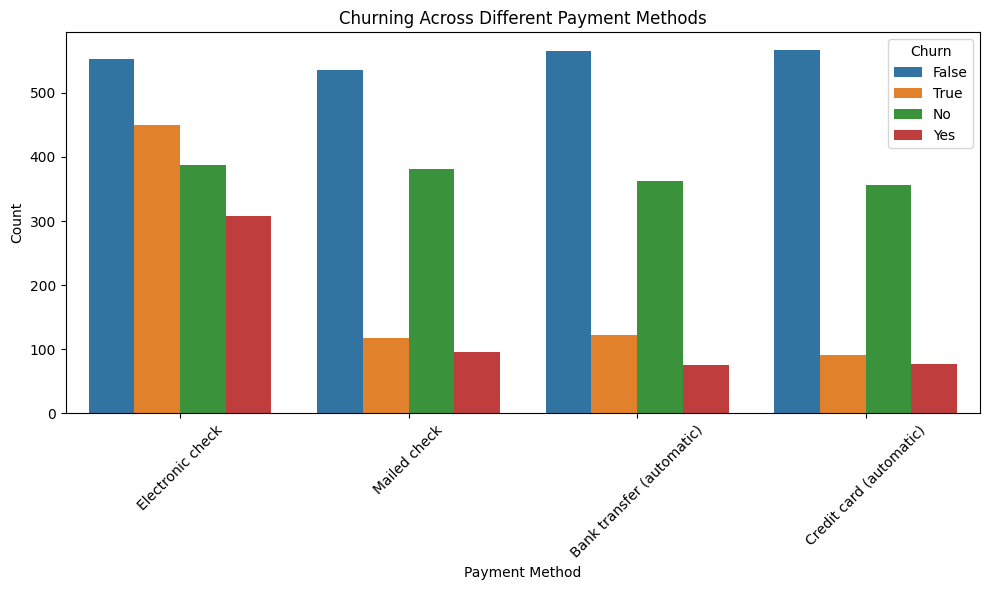

In [30]:
# countplot showing rate of churning across payment methods
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='paymentmethod', hue='churn')
plt.title('Churning Across Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

In [31]:
# Type of contract and churning?


<Figure size 1000x600 with 0 Axes>

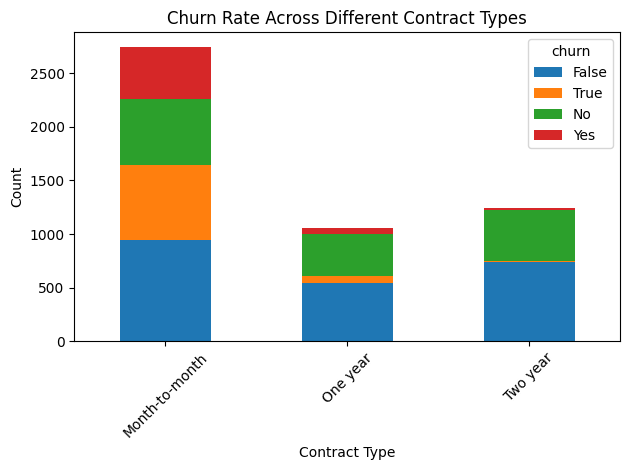

In [32]:
# Group the data by 'Contract' and 'Churn', and count the occurrences
contract_churn_counts = df.groupby(['contract', 'churn']).size().unstack()

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
contract_churn_counts.plot(kind='bar', stacked=True)
plt.title('Churn Rate Across Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='churn', loc='upper right')
plt.tight_layout()
plt.show()

In [33]:
Monthly Charges and Churning

SyntaxError: invalid syntax (4188067971.py, line 1)

ValueError: The palette dictionary is missing keys: {'False', 'True'}

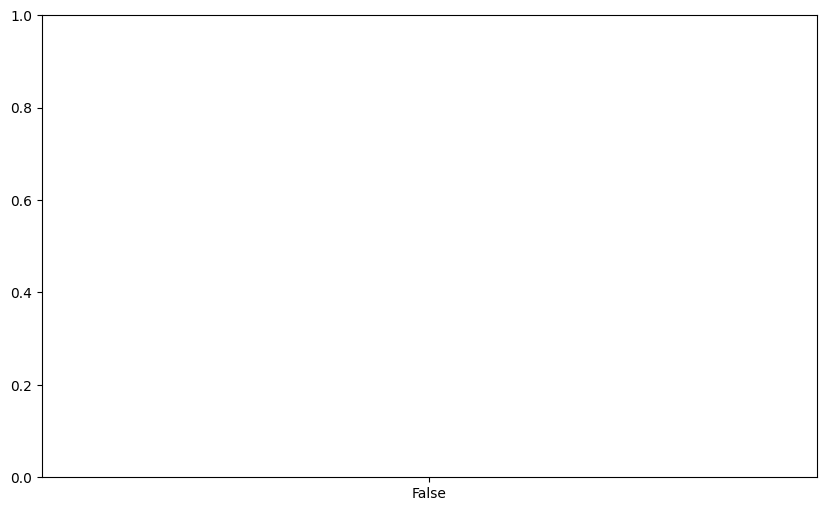

In [34]:
# Define custom color palette
custom_palette = {'No': 'blue', 'Yes': 'orange'}

# Create a box plot of monthly charges by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='monthlycharges', data=df, palette=custom_palette)
plt.title('Impact of Monthly Charges on Customer Churning')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [ ]:
# partner